In [62]:
%matplotlib inline

In [63]:
import base64
import json
import requests
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

## This notebook tests the image classification service. 

In [64]:
# Assume the API server is running on localhost port 20000
# This is a REST service, we need to post the image to the /classify resource, the result
# will be a json file
SVC_URL="http://localhost:20000/classify"

In [65]:
def submit_image_to_server(image_path):
    with open(image_path, 'rb') as f:
        image = f.read()
        
    image_b64 = base64.b64encode(image)
    input = "data:image/jpeg;base64,%s" % image_b64.decode('utf8')
    request = {"image": input}
    binary_json = json.dumps(request).encode("utf-8")
    
    r = requests.post(SVC_URL, data=binary_json)
    if r.content == '':
        logging.error('Empty content for image from classifier')
        return None
    results = json.loads(r.content.decode('utf8'))
    
    return results

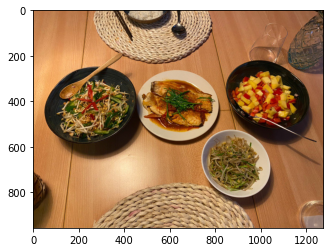

In [66]:
image_path = "images/photo_2021-05-23 23.22.42.jpeg"
img = mpimg.imread(image_path)
plt.imshow(img)

In [67]:
results = submit_image_to_server(image_path)
print(results['tag'])

Spaghetti
